<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [3]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv('C:/Users/carls/OneDrive/Desktop/IOD/Data/titanic.csv')

# Explore Dataset

## Head

In [4]:
# Check Head
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Tail

In [5]:
# Check Tail
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Shape

Find shape of dataset.

In [6]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [7]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [8]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Check titanic data again
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [10]:
# Finding the null values of age
titanic.Age.isnull().sum()

177

In [11]:
#Replacing the null values with the mean age of all passengers
#In the absence of passenges actual age, this is one accurate method that will not change the overall mean stat of the data.
#titanic.Age.fillna(titanic.Age.mean(), inplace = True)

In [13]:
titanic['Age'].fillna(titanic.groupby(by=['Sex'])['Age'].transform("mean"), inplace=True) 

In [14]:
#Checking my code
titanic.Age.isnull().sum()

0

### Cabin

In [15]:
# Finding how many null values there are in the Cabin column
titanic.Cabin.isnull().sum()

687

In [16]:
#Replacing all NaN cabin values with A100 - this replicates the pattern of cabin numbers where they were known, but is identifiable to me as the data that I input.
titanic.Cabin.fillna('A100', inplace = True)

In [17]:
#Checking my code
titanic.Cabin.isnull().sum()

0

### Embarked

In [18]:
# Finding out how many null values there are in the Embarked column
titanic.Embarked.isnull().sum()

2

In [19]:
#Finding out how the data is spread in the Embarked column
titanic.Embarked.value_counts().nunique

<bound method IndexOpsMixin.nunique of S    644
C    168
Q     77
Name: Embarked, dtype: int64>

In [20]:
#Given that 644 passengers embarked at port 'S' (Southampton) and only 245 at the other ports, I will replace the two missing values with 'S' given that this is where the majority of the data lies.
titanic.Embarked.fillna('S', inplace = True)

In [21]:
#Checking my code
titanic.Embarked.isnull().sum()

0

# Describe

Describe your dataset.

In [22]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [23]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

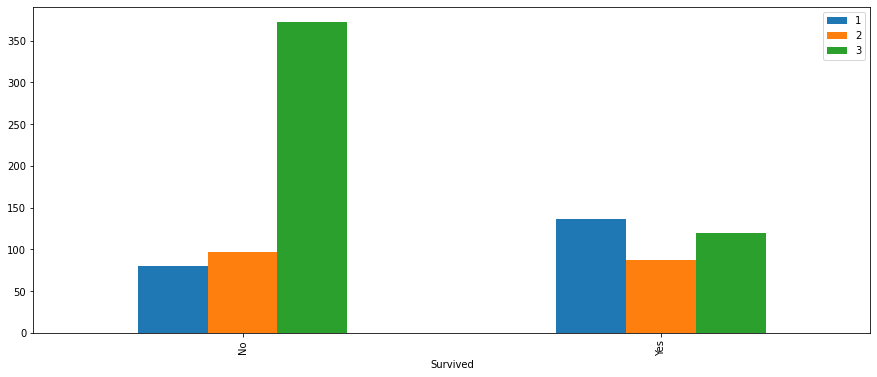

In [24]:
bar_charts(titanic, titanic['Pclass'])

The above bar chart shows that 3rd class ticket holders represent the group with the most deaths, with first class passengers having the most survivals, and least deaths.

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

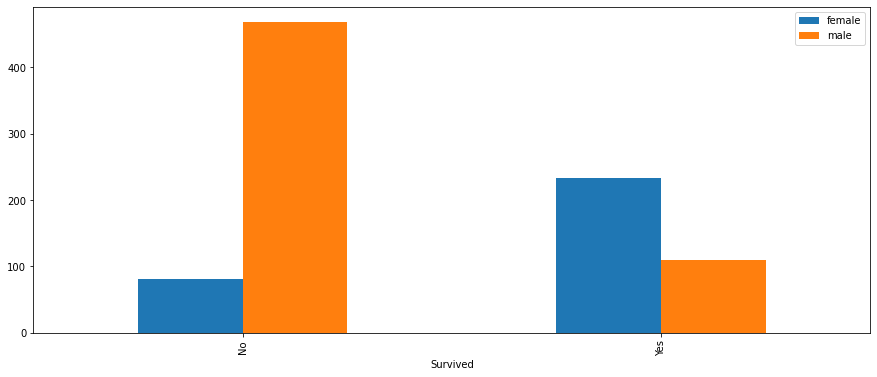

In [25]:
bar_charts(titanic, titanic['Sex'])

The above bar chart shows us that males had the highest number of deaths, where females had the highest survival rate.

## Parch

Parch = Number of parents of children travelling with each passenger.

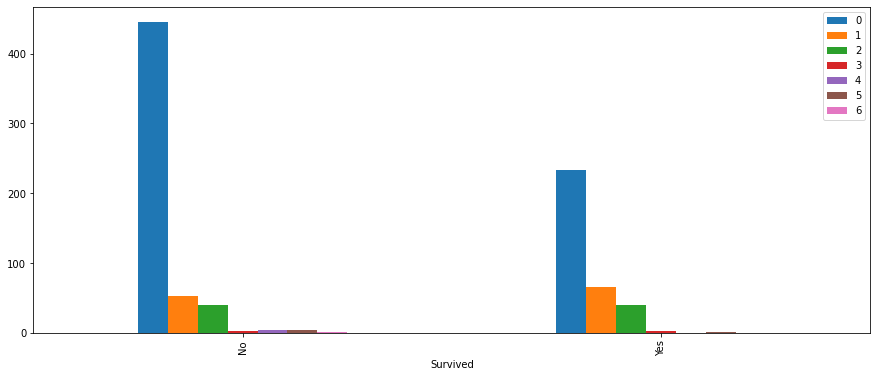

In [26]:
bar_charts(titanic, titanic['Parch'])

This above graph shows us those those passengers travelling with zero children had the highest death toll.

## SibSp

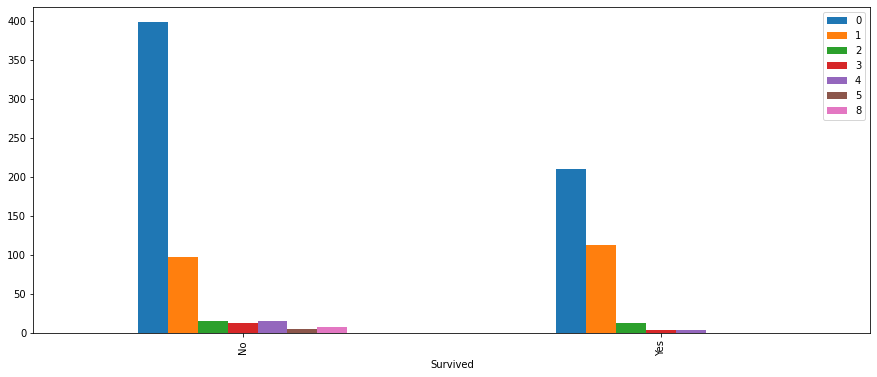

In [27]:
bar_charts(titanic, titanic['SibSp'])

The above data relates to the number of siblings / spouses aboard the Titanic, from this graph, we can see that those with zero spouses or siblings had the highest death toll. Of the survivors, those with no spouse or sibling also represent the highest popluation, followed by those with 1. It is interesting that those with zero represnt the highest population in both categories of survived.

## Embarked

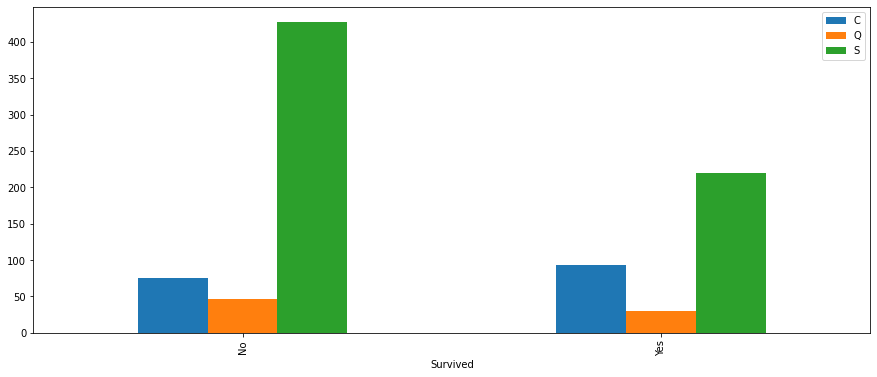

In [28]:
bar_charts(titanic, titanic['Embarked'])

For ease of reference, the Embarkments ports are = C = Cherbourg, Q = Queenstown, S = Southampton
While we can see here that those that embarked at Southampton represent the highest figures in both of the survived categories (yes or no), we can conclude that this is because those passengers that embarked at this port represent 72% of all passengers on board. Perhaps if the disribution between the ports was more even this result would also be more even.

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [29]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [30]:
titanic['Fareclass'] = pd.cut(titanic['Fare'], bins=[0, 10, 20, 30, np.inf], labels=['4', '3', '2', '1'])

In [31]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Fareclass  
0      0         A/5 21171   7.2500  A100        S         4  
1      0          PC 17599  71.2833   C85        C         1  
2      0  STON/O2. 3101282   7.9250  A100        S         4  
3      0            113803  53.1000  C123        S         1  
4      0            373450   8.0500  A100        S         4

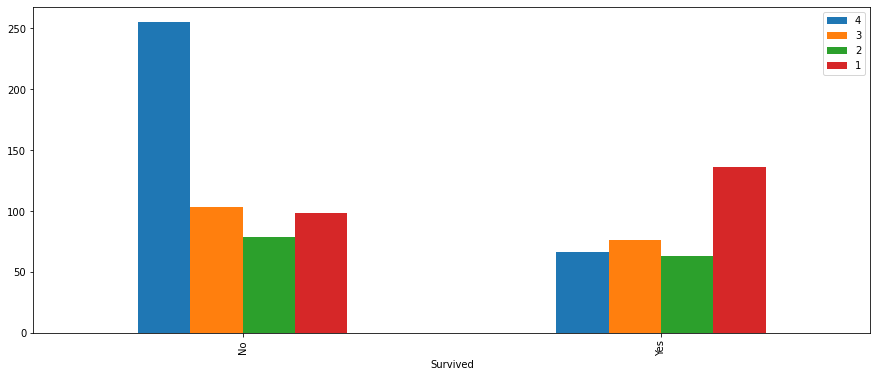

In [32]:
bar_charts(titanic, titanic['Fareclass'])

The above graph demonstrates that those passengers that were in fourth class had a higher death rate than those in other classes, those in first class had the highest survival rate.

## Age Class

In [33]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [34]:
titanic['Ageclass'] = pd.cut(titanic['Age'], bins=[0, 16, 25, 35, 60, np.inf], labels=['1','2', '3', '4', '5'])

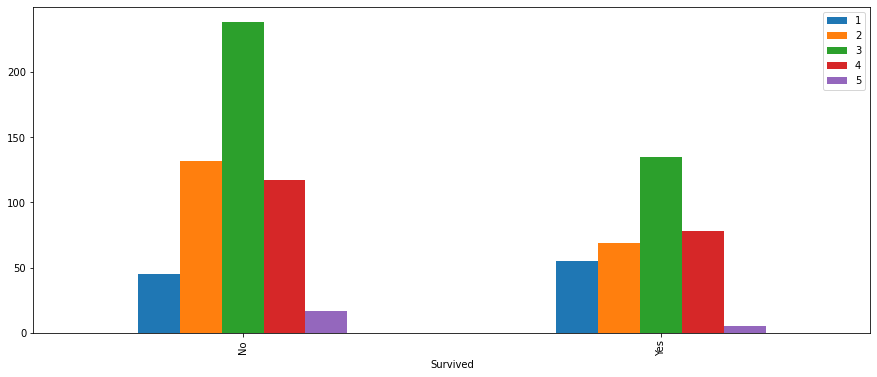

In [35]:
bar_charts(titanic, titanic['Ageclass'])

This graph demonstrates that those in age group 3 had both the highest death rate and survival rate. I assume that this is because this is the age bracket of the biggest proportion of the passengers. I will explore this below.

In [36]:
titanic.Ageclass.value_counts().nunique

<bound method IndexOpsMixin.nunique of 3    373
2    201
4    195
1    100
5     22
Name: Ageclass, dtype: int64>

As we can see above, there were 373 passengers in the third age bracket (25-35 years old), this accounts for 41% of the passengers.

# Staistical Overview

## Correlation

Find correlation between `survived` and other features.

In [37]:
titanic.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [50]:
#Sorting data into two age groups
titanic_young = titanic[titanic['Age'] <= 35].sample(100, random_state=42)
titanic_old = titanic[titanic['Age'] > 35].sample(100, random_state=42)

In [52]:
titanic_young['Survived'].value_counts()

0    58
1    42
Name: Survived, dtype: int64

In [53]:
titanic_old['Survived'].value_counts()

0    66
1    34
Name: Survived, dtype: int64

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [40]:
alpha = 0.05

Test statistic: We can compare the new age (young/old) groups with mean survival rates to test the hypothesis

### Calculate point estimate

In [41]:
#its mean to calculate variance and standard deviation

In [42]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()
N= 100
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [43]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
t

-0.42716483137068173

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [44]:
from scipy import stats

In [45]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(abs(t),df=df)

In [46]:
p

0.33486171171780765

In [47]:
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.42716483137068173
p = 0.6697234234356153


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [48]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [78]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 1.2905117437465126
p = 0.198377984416724
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



